In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

%matplotlib inline

In [52]:
sms = pd.read_csv('spam.csv',encoding='ISO-8859-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,not spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,not spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [53]:
cols_to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
sms.drop(cols_to_drop,axis=1,inplace=True)
sms.columns = ['label','message']
sms.head()

,label,message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [56]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(sms['message'])

X_train, X_test, y_train, y_test = train_test_split(X, sms['label'], test_size=0.3, random_state=101)

In [57]:
sms['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [58]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print('training accuracy is --> ',mnb.score(X_train,y_train)*100)
print('test accuracy is --> ',mnb.score(X_test,y_test)*100)

training accuracy is -->  99.41025641025641
test accuracy is -->  98.56459330143541


In [69]:
def visualize(label):
    words = ''
    for msg in sms[sms['label']==label]['message']:
        msg = msg.lower()
        words+=msg + ' '
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

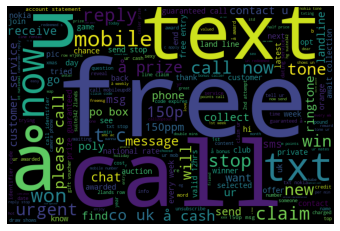

In [70]:
visualize('spam')

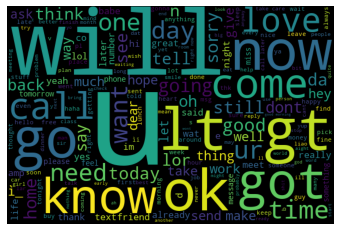

In [71]:
visualize('not spam')

In [65]:
your_message = input('Enter the message you received --> ')
your_message = cv.transform([your_message])
a=mnb.predict(your_message)
print(a[0])

Enter the message you received --> i have an important work with you please call me
not spam
